## Metropolis Sampler, From the 1953 Paper.




(10, 10)


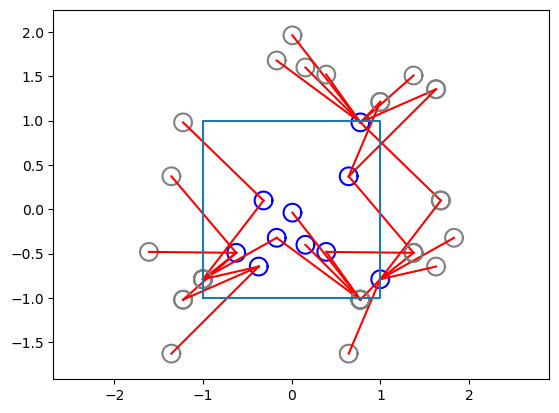

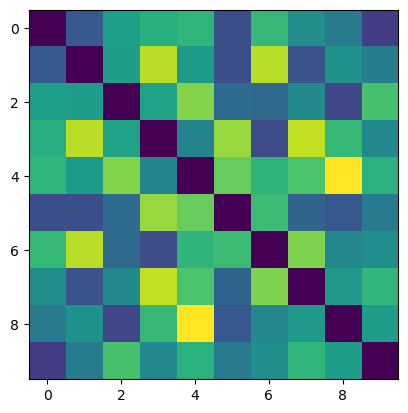

In [ ]:
import jax.numpy as jnp
from jax import vmap, grad
import matplotlib.pyplot as plt
from jax.random import uniform, PRNGKey, split

N = 100
d_ab = 1.


def dist(A, B):
    # Find closest periodic distance between A and B
    d1 = ((A[0]-B[0] + 1) % 2) -1
    d2 = ((A[1]-B[1] + 1) % 2) -1
    return (d1**2 + d2**2)**0.5

def find_closest(A, B):
    # Find closest version of particle (for visualization only)
    d1 = ((A[0]-B[0] + 1) % 2) -1
    d2 = ((A[1]-B[1] + 1) % 2) -1
    return B[0] + d1, B[1] + d2

def rejection_sampling(key, N, r, dmin=0):
    coord_list = []
    successes = 0
    while successes < N:
        key, skey = split(key, 2)
        coord = uniform(skey, (2,), minval=-1, maxval=1)
        dists = [dist(coord, c) for c in coord_list] + [3.]
        if min(dists)-2*r>dmin:
            coord_list.append(coord)
            successes += 1
        else:
            pass
    return jnp.array(coord_list)


def plot_circle(coord, r, **kwargs):
    t = jnp.linspace(0,2*jnp.pi,100)
    cost = jnp.cos(t)
    sint = jnp.sin(t)
    plt.plot(cost*r + coord[0], sint*r + coord[1], **kwargs)

def plot_circles(coords, r, **kwargs):
    for c in coords:
        plot_circle(c, r, **kwargs)
        

def plot_box(**kwargs):
    plt.plot([-1,1,1,-1,-1],[-1,-1,1,1,-1],**kwargs)
        
def plot_circle_distances(coords, r):
    for c1 in coords:
        for c2 in coords:
            c2c1 = find_closest(c2, c1)
            if max([abs(c) for c in c2c1]) > 1:
                plot_circle(c2c1, r, color="grey")
                plt.plot([c2c1[0], c1[0]], [c2c1[1], c1[1]], color="red")
    
def potential_energy(x, y):
    # Potential energy function
    d = dist(x, y)
    return V(d)
    
def potential(V, coords):
    dists = vmap(lambda y: vmap(lambda x: dist(x,y), 0)(coords), 0)(coords)
    V_dists = V(dists)
    return V_dists#jnp.sum(jnp.sum(V_dists))
    

r = 0.1
coords = rejection_sampling(PRNGKey(0), 10, r, 0.0)
plot_circles(coords, r, color="blue")
plot_circle_distances(coords, r)
plot_box()
plt.axis("equal")


plt.figure()
V = potential(lambda x: x, coords)
print(V.shape)
plt.imshow(V)
    
    
    


